In [1]:
from datetime import datetime, timedelta

from queryportal.subgraphinterface import SubgraphInterface
from subutil.schema_utils import *

import polars as pl
pl.Config.set_fmt_str_lengths(200)

polars.config.Config

In [2]:
sgi = SubgraphInterface(endpoints={
    'olympus-rbs': 'https://api.playgrounds.network/v1/proxy/subgraphs/id/Cy4Y1UCyitfBZATr3PjC3s2eUwj1XxqZMN2tTGgZCNGe' # indexed on Ethereum. Arbitrum isn't supported yet
    }
)

In [3]:
# get all queryable columns
# 2b) Load subgraph object
sg = sgi.subject.subgraphs['olympus-rbs']

# 2c) Get all schema entities
schema_entity_list = getSubgraphSchema(sg)

# 3) Select queryable schema entities
query_field = getQueryFields(sg, schema_entity_list[schema_entity_list.index('Query')])
print(query_field.keys())

dict_keys(['rangeSnapshots', 'priceEvents', 'pricesChangedEvents', 'spreadsChangedEvents', 'thresholdFactorChangedEvents', 'movingAverageDurationChangeds', 'newObservations', 'observationFrequencyChangeds', 'updateThresholdsChangeds', 'minimumTargetPriceChangeds', 'beats', 'beatRewardIssueds', 'beatRewardUpdateds'])


In [4]:
rbs_test = sgi.query_entity(
    query_size=100000,
    entity='rangeSnapshots',
    name='olympus-rbs'
)

# 1289 start - 1402 end, took 113 queries.

Querying endpoint: olympus-rbs
Return empty dict because filter_dict param is empty
Shape: (100000, 26)
Schema: {'blockchain': Utf8, 'block': Int64, 'date': Utf8, 'timestamp': Int64, 'ohmPrice': Float64, 'ohmMovingAveragePrice': Float64, 'thresholdFactor': Float64, 'cushionSpread': Float64, 'wallSpread': Float64, 'highActive': Boolean, 'lowActive': Boolean, 'highLastActiveTimestamp': Int64, 'lowLastActiveTimestamp': Int64, 'highCapacityOhm': Float64, 'lowCapacityReserve': Float64, 'highCushionPrice': Float64, 'lowCushionPrice': Float64, 'highMarketId': Boolean, 'lowMarketId': Int64, 'highWallPrice': Float64, 'lowWallPrice': Float64, 'treasuryReserveAddress': Utf8, 'treasuryReserveBalance': Float64, 'treasuryDebtBalance': Float64, 'operatorReserveFactor': Float64, 'operatorCushionFactor': Float64}
Function 'query_entity' executed in 577.7976s


<Axes: xlabel='timestamp'>

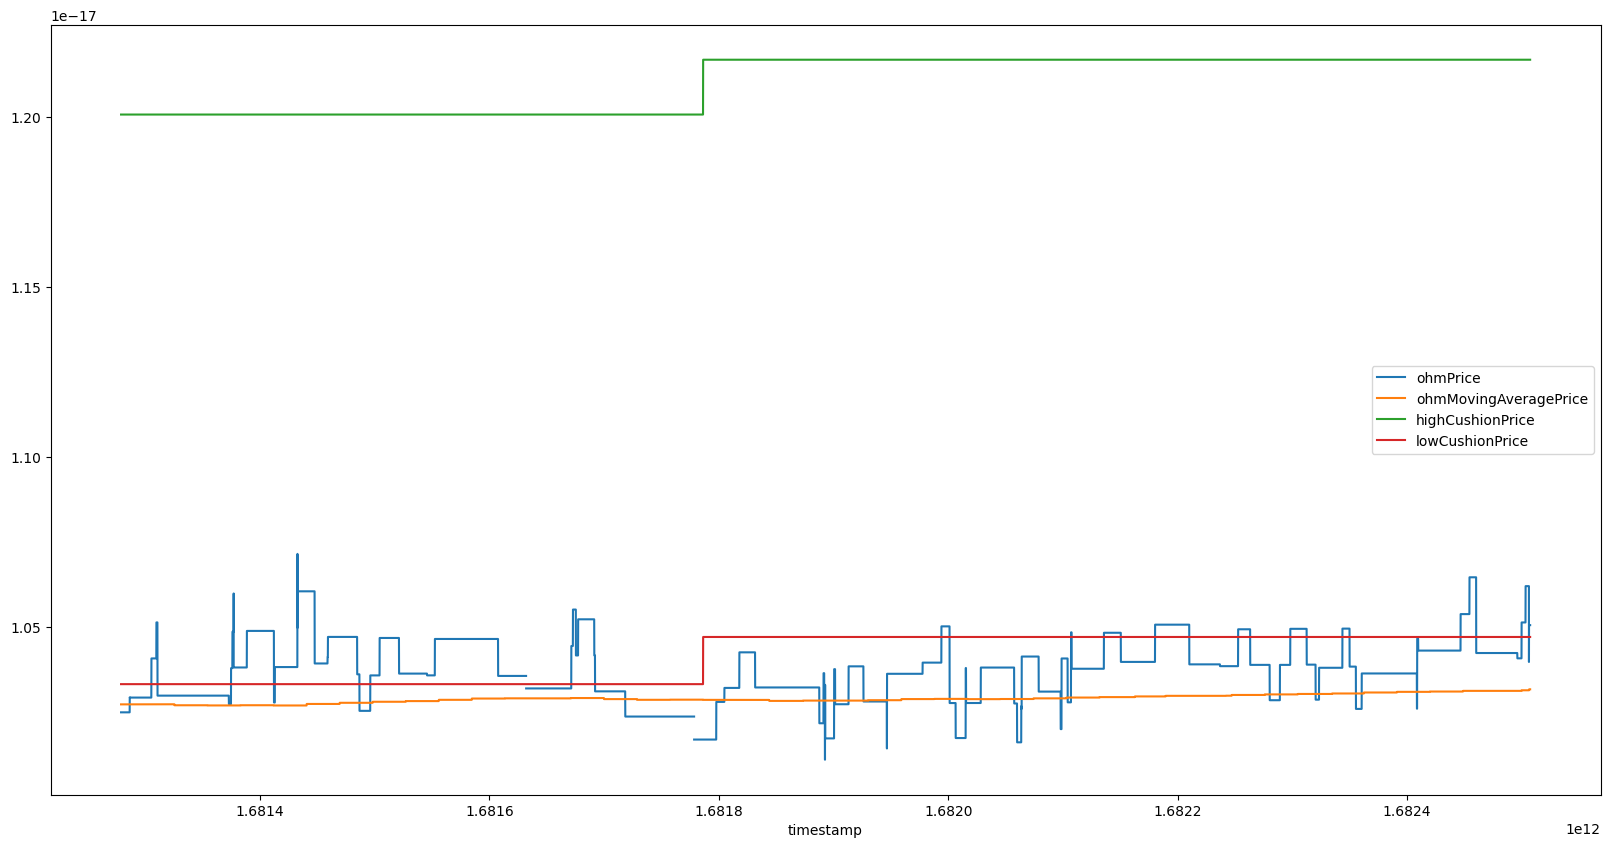

In [5]:
# plot highCushionPrice, lowCushionPrice, ohmPrice, and ohmMovingAveragePrice
rbs_test_df = rbs_test.to_pandas()

rbs_test_df['date'] = rbs_test_df['date']
rbs_test_df['ohmPrice'] = rbs_test_df['ohmPrice'].apply(lambda x: x / 1e18)
rbs_test_df['ohmMovingAveragePrice'] = rbs_test_df['ohmMovingAveragePrice'].apply(lambda x: x / 1e18)
rbs_test_df['highCushionPrice'] = rbs_test_df['highCushionPrice'].apply(lambda x: x / 1e18)
rbs_test_df['lowCushionPrice'] = rbs_test_df['lowCushionPrice'].apply(lambda x: x / 1e18)

rbs_test_df.plot(x='timestamp', y=['ohmPrice', 'ohmMovingAveragePrice', 'highCushionPrice', 'lowCushionPrice'], figsize=(20, 10))
